In [20]:
import numpy as np
import matplotlib.pyplot as plt

functions = [
    lambda x: x - np.sin(4*x) - 0.25,
    lambda x: x**3 - np.exp(x),
    lambda x: np.log10(x+2) + 7/(2*x-6),
]

def get_values(x, func):
    y = []
    for x_ in x:
        y.append(func(x_))
    return y

def get_equal_range(a, b, n):
    range_ = []
    adder = (b - a) / (n - 1)
    for i in range(n):
        range_.append(a + adder * i)
    return range_

def get_optimal_range(a, b, n):
    range_ = []
    for i in range(n):
        range_.append(((b - a) * np.cos((2 * i + 1) * np.pi / (2 * n)) + (b + a)) / 2)
    return range_[::-1]

def find_indexes(arr, x):
    a = -1
    b = -1

    for i in range(len(arr)):
        if arr[i] <= x:
            a = i
        elif arr[i] > x:
            b = i
            break

    if a != -1 and b != -1:
        return a, b
    else:
        return None

class Spline1:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def calculate(self, x):
        if x in self.x:
            return self.y[self.x.index(x)]
        else:
            i_, i__ = find_indexes(self.x, x)
            return self.y[i_] + (self.y[i__] - self.y[i_])*(x - self.x[i_])/(self.x[i__] - self.x[i_])

    def calculate_range(self, x):
        y = []
        for x_ in x:
            y.append(self.calculate(x_))
        return y

def test(func, a, b, start_n, end_n, plot_n):
    for n in range(start_n, end_n+1):
        fig, axs = plt.subplots(1, 1, figsize=(3, 3))
        plot_range = get_equal_range(a, b, plot_n)
        plot_values = get_values(plot_range, func)
        axs.plot(plot_range, plot_values, linewidth=2.0, color='g')

        eq_range = get_equal_range(a, b, n)
        eq_values = get_values(eq_range, func)
        eq_pol = Spline1(eq_range, eq_values)
        eq_spline1_values = eq_pol.calculate_range(plot_range)
        axs.plot(plot_range, eq_spline1_values, linewidth=2.0, color='r')
        axs.set_title(f'eq, pnt: {n}, err: {np.around(np.linalg.norm(np.matrix(plot_values) - np.matrix(eq_spline1_values)), 2)}')
        axs.grid(True)

First test:


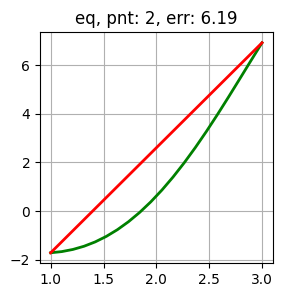

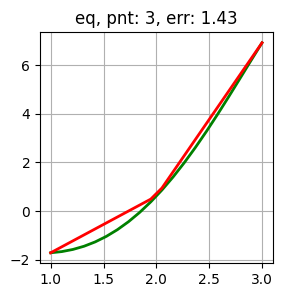

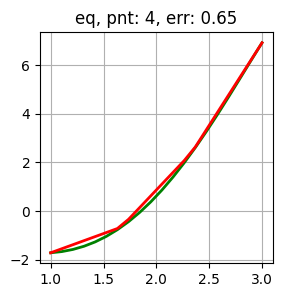

In [21]:
test_func = functions[1]
test_a = 1
test_b = 3
test_start_n = 2
test_end_n = 4
test_plot_n = 20
print('First test:')
test(test_func, test_a, test_b, test_start_n, test_end_n, test_plot_n)